In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

color='#4e6c50'

In [11]:
cols = ['Income',
        'Kidhome',
        'Teenhome',
        'Recency',
        'NumWebVisitsMonth',
        'MntWines',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds',
        'NumDealsPurchases',
        'NumWebPurchases',
        'NumCatalogPurchases',
        'NumStorePurchases',
        'NumWebVisitsMonth']

data = pd.read_csv('data/marketing_campaign.csv', sep='\t', usecols=cols)

data = data.fillna(data.median(numeric_only=True))

print(data.shape)
data.head()

(2240, 15)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [5]:
# Scaling data
X = data.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA from scratch

In [6]:
# Covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Explained variance
explained_variances = eigenvalues / np.sum(eigenvalues)
cum_sum_var = np.cumsum(explained_variances)

# Principal components
PC = np.asarray(
    [X_scaled.dot(eigenvectors.T[i]) for i in range(len(eigenvectors))]
).T

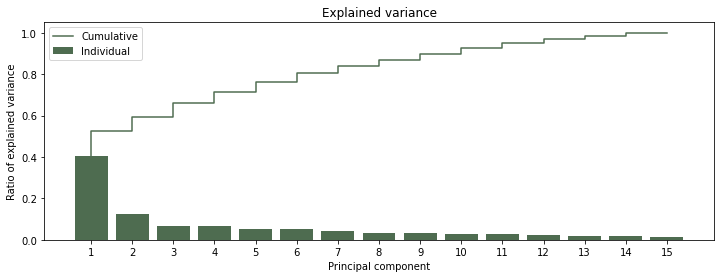

In [28]:
x_axis = range(1, len(cum_sum_var)+1)
plt.figure(figsize=(12,4))
plt.bar(x_axis, explained_variances, label='Individual', color=color)
plt.step(x_axis, cum_sum_var,label='Cumulative', color=color)
plt.title('Explained variance')
plt.ylabel('Ratio of explained variance')
plt.xlabel('Principal component')
plt.legend()
plt.xticks(x_axis)
plt.show()

# PCA with scikit-learn 

In [8]:
from sklearn.decomposition import PCA

# PCA
pca = PCA()
PC = pca.fit_transform(X_scaled)

# Explained variance
explained_variances = pca.explained_variance_ratio_
cum_sum_var = np.cumsum(explained_variances)

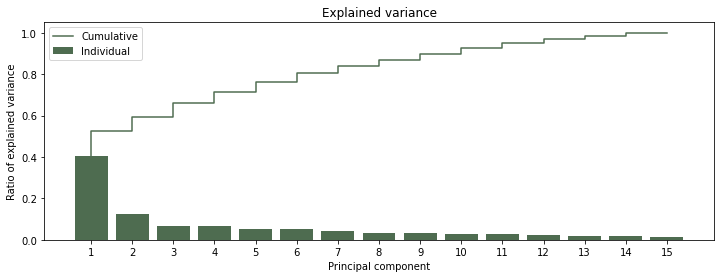

In [29]:
x_axis = range(1, len(cum_sum_var)+1)
plt.figure(figsize=(12,4))
plt.bar(x_axis, explained_variances, label='Individual', color=color)
plt.step(x_axis, cum_sum_var,label='Cumulative', color=color)
plt.title('Explained variance')
plt.ylabel('Ratio of explained variance')
plt.xlabel('Principal component')
plt.legend()
plt.xticks(x_axis)
plt.show()